<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/spatial_matching_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPATIAL MATCHING FILTERING

# IMPORTS

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Download image from online

In [ ]:
!wget "https://imgs.search.brave.com/kcex86tLO9Vko4wJgB_xU89duvlT1k0QhPEWsopG2ws/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly90NC5m/dGNkbi5uZXQvanBn/LzA1LzM4LzQ3LzA5/LzM2MF9GXzUzODQ3/MDk5Nl9FeDl2VFp4/Z1B2cHRnY2xWWjlp/T1I3T2NDcHpkQ3VX/Ri5qcGc" -O "/content/image.jpg"

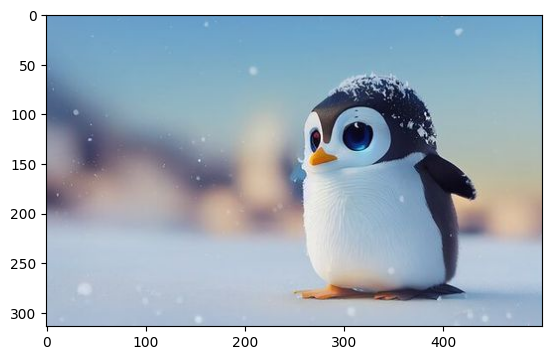

In [3]:
image = cv.imread('image.jpg')
gray = cv.cvtColor(image.copy(), cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB))

In [4]:
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened = cv.filter2D(image, -1, sharpen_kernel)

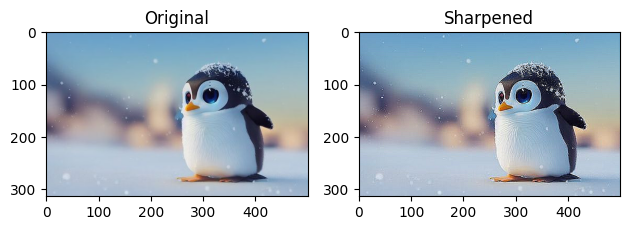

In [5]:
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Sharpened')
plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

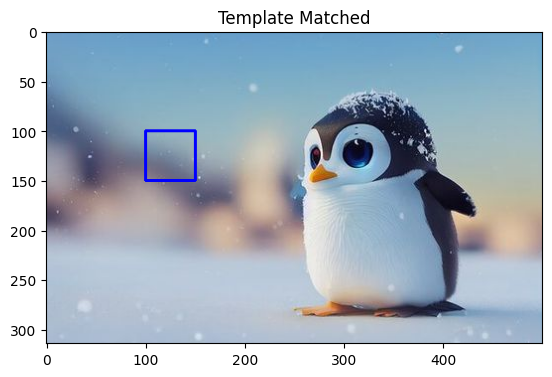

In [17]:
template = image[100:150, 100:150]
result = cv.matchTemplate(image, template, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

top_left = max_loc

# print(template.shape)
h, w, _ = template.shape
matched = cv.rectangle(image.copy(), top_left, (top_left[0]+w, top_left[1]+h), 255, 2)

plt.imshow(cv.cvtColor(matched, cv.COLOR_BGR2RGB))
plt.title("Template Matched")
plt.show()